# SEIR
{func}`.SEIR`

A Susceptible-Exposed-Infectious-Recovered (SEIR) model is a more realistic extension of the standard SIR model in which individuals do not become instantly infectious upon exposure, but undergo an incubation period, the timescale of which is governed by the parameter, $\alpha$:

$$\begin{aligned}
\frac{\mathrm{d}S}{\mathrm{d}t} &= - \frac{\beta SI}{N} \\
\frac{\mathrm{d}E}{\mathrm{d}t} &= \frac{\beta SI}{N} - \alpha E \\
\frac{\mathrm{d}I}{\mathrm{d}t} &= \alpha E - \gamma I \\
\frac{\mathrm{d}R}{\mathrm{d}t} &= \gamma I
\end{aligned}$$

We use the flu-like parameters of the SIR model demonstration with an incubation period of 2 days.

In [1]:
from pygom import common_models
import matplotlib.pyplot as plt
import numpy as np
import random
import math

#####################
# Set up PyGOM object
#####################

# Parameters
n_pop=1e4
gamma=1/4
alpha=1/2
R0=1.3
beta=R0*gamma

ode = common_models.SEIR({'beta':beta, 'gamma':gamma, 'alpha':alpha, 'N':n_pop})

# Time range and increments
tmax=365                              # maximum time over which to run solver
dt=0.1                                # timestep
n_timestep=math.ceil(tmax/dt)         # number of iterations
t = np.linspace(0, tmax, n_timestep)  # times at which solution will be evaluated

# Initial conditions
i0=1
x0=[n_pop-i0, 0, i0, 0]
ode.initial_values = (x0, t[0])

# Deterministic evolution
solution=ode.solve_determ(t[1::])

We also run an SIR model with the same parameters to compare the outputs

In [2]:
ode = common_models.SIR({'beta':beta, 'gamma':gamma, 'N':n_pop})

x0=[n_pop-i0, i0, 0]
ode.initial_values = (x0, t[0])

solution2=ode.solve_determ(t[1::])

We see that the SEIR model changes the profile of the epidemic as compared with an SIR model, but the overall final sizes are the same.

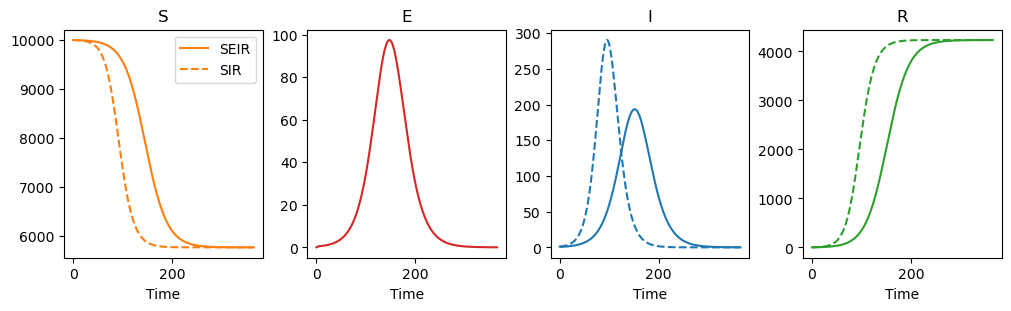

In [7]:
# Plot

f, axarr = plt.subplots(1,4, layout='constrained', figsize=(10, 3))

# Plot colours
colours=["C1", "C3", "C0", "C2"]
stateList=["S", "E", "I", "R"]

for i in range(0, 4):
    axarr[i].plot(t, solution[:,i], color=colours[i], label="SEIR")
    axarr[i].set_title(stateList[i])
    if i in [0,2,3]:
        if i in [2,3]:
            axarr[i].plot(t, solution2[:,i-1], color=colours[i], linestyle="dashed")
        else:
            axarr[i].plot(t, solution2[:,i], color=colours[i], linestyle="dashed", label="SIR")
    axarr[i].set_xlabel('Time')

axarr[0].legend()

plt.show()